#PROBLEM STATEMENT

This project addresses the critical challenge faced by retailers and manufacturers: how to effectively forecast product demand based on technical specifications and regional dynamics. More specifically, we aim to discover which hardware features (e.g.RAM,ROM, price) and contextual factors (e.g., region, brand) are most influential in driving product sales. By understanding these relationships, businesses can make informed decisions regarding inventory planning, product bundling, marketing strategies, and pricing models. Our problem statement thus revolves around predicting the quantity of products sold using available structured data, with the ultimate goal of enhancing operational efficiency and customer satisfaction. The project considers the multifaceted nature of the dataset, which includes categorical, numerical, and date-time features, and aims to develop a predictive framework adaptable to similar datasets in the future.

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,f1_score
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor # Import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import f1_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [244]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [245]:
df = pd.read_csv("/content/drive/MyDrive/mobile_sales_data (1).csv")

In [246]:
df.head()

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Core Specification,Processor Specification,RAM,ROM,SSD
0,Mobile Phone,Motorola,88EB4558,Site candidate activity company there bit insi...,78570,2023-08-02,2023-08-03,6,William Hess,South Kelsey,Central,NaN,Snapdragon 7 Gen,12GB,128GB,NaN
1,Laptop,Oppo,416DFEEB,Beat put care fight affect address his.,44613,2023-10-03,2023-10-06,1,Larry Smith,North Lisa,South,Ryzen 5,Ryzen 5,8GB,512GB,256GB
2,Mobile Phone,Samsung,9F975B08,Energy special low seven place audience.,159826,2025-03-19,2025-03-20,5,Leah Copeland,South Todd,Central,NaN,MediaTek Dimensity,8GB,256GB,NaN
3,Laptop,Sony,73D2A7CC,Friend record hard contain minute we role sea ...,20911,2024-02-06,2024-03-27,1,Dan Kirby,New Jordanmouth,South,i7,i7,12GB,64GB,2TB
4,Laptop,Microsoft,CCE0B80D,Program recently feeling save tree hotel people.,69832,2023-08-10,2023-09-10,4,Dean Martin,Keithton,East,i7,i7,8GB,128GB,2TB


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Product                  50000 non-null  object
 1   Brand                    50000 non-null  object
 2   Product Code             50000 non-null  object
 3   Product Specification    50000 non-null  object
 4   Price                    50000 non-null  int64 
 5   Inward Date              50000 non-null  object
 6   Dispatch Date            50000 non-null  object
 7   Quantity Sold            50000 non-null  int64 
 8   Customer Name            50000 non-null  object
 9   Customer Location        50000 non-null  object
 10  Region                   50000 non-null  object
 11  Core Specification       25017 non-null  object
 12  Processor Specification  50000 non-null  object
 13  RAM                      50000 non-null  object
 14  ROM                      50000 non-nul

In [248]:
df.describe()

,Price,Quantity Sold
count,50000.000000,50000.00000
mean,102641.407080,5.51378
std,56363.550361,2.88101
min,5008.000000,1.00000
25%,53487.000000,3.00000
50%,103072.000000,6.00000
75%,151396.250000,8.00000
max,199999.000000,10.00000


In [249]:
df.isnull().sum()

,0
Product,0
Brand,0
Product Code,0
Product Specification,0
Price,0
Inward Date,0
Dispatch Date,0
Quantity Sold,0
Customer Name,0
Customer Location,0


In [250]:
cols=['Product Code','Inward Date','Dispatch Date',
      'Customer Name','Customer Location','Core Specification','Processor Specification','SSD']

In [251]:
df.drop(columns=[col for col in cols if col in df.columns],axis=1,inplace=True)

In [252]:
df.head()

,Product,Brand,Product Specification,Price,Quantity Sold,Region,RAM,ROM
0,Mobile Phone,Motorola,Site candidate activity company there bit insi...,78570,6,Central,12GB,128GB
1,Laptop,Oppo,Beat put care fight affect address his.,44613,1,South,8GB,512GB
2,Mobile Phone,Samsung,Energy special low seven place audience.,159826,5,Central,8GB,256GB
3,Laptop,Sony,Friend record hard contain minute we role sea ...,20911,1,South,12GB,64GB
4,Laptop,Microsoft,Program recently feeling save tree hotel people.,69832,4,East,8GB,128GB


In [253]:
df.isnull().sum()

,0
Product,0
Brand,0
Product Specification,0
Price,0
Quantity Sold,0
Region,0
RAM,0
ROM,0


# spliting Products into two categories

1. Mobile Phone
2. Laptops


In [254]:
#Mobile Phone
ph=df[df['Product']=='Mobile Phone'].copy() #to avoid SettingWithCopyWarning

In [255]:
ph.head()

,Product,Brand,Product Specification,Price,Quantity Sold,Region,RAM,ROM
0,Mobile Phone,Motorola,Site candidate activity company there bit insi...,78570,6,Central,12GB,128GB
2,Mobile Phone,Samsung,Energy special low seven place audience.,159826,5,Central,8GB,256GB
6,Mobile Phone,Dell,Could before almost wind couple evening perfor...,11670,6,North,16GB,256GB
9,Mobile Phone,Motorola,Responsibility form left final suffer party pi...,174698,10,North,6GB,64GB
10,Mobile Phone,Apple,To say system loss near him.,51251,9,North,4GB,256GB


In [256]:
ph.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24983 entries, 0 to 49998
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Product                24983 non-null  object
 1   Brand                  24983 non-null  object
 2   Product Specification  24983 non-null  object
 3   Price                  24983 non-null  int64 
 4   Quantity Sold          24983 non-null  int64 
 5   Region                 24983 non-null  object
 6   RAM                    24983 non-null  object
 7   ROM                    24983 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.7+ MB


In [257]:
ph.isnull().sum()

,0
Product,0
Brand,0
Product Specification,0
Price,0
Quantity Sold,0
Region,0
RAM,0
ROM,0


In [258]:
lap=df[df['Product'] == 'Laptop'].copy()

In [259]:
lap.head()

,Product,Brand,Product Specification,Price,Quantity Sold,Region,RAM,ROM
1,Laptop,Oppo,Beat put care fight affect address his.,44613,1,South,8GB,512GB
3,Laptop,Sony,Friend record hard contain minute we role sea ...,20911,1,South,12GB,64GB
4,Laptop,Microsoft,Program recently feeling save tree hotel people.,69832,4,East,8GB,128GB
5,Laptop,HP,Recognize happen middle clear simple player po...,190474,1,Central,16GB,64GB
7,Laptop,Apple,Reality sea weight thing newspaper good next g...,15041,1,South,12GB,128GB


In [260]:
lap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25017 entries, 1 to 49999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Product                25017 non-null  object
 1   Brand                  25017 non-null  object
 2   Product Specification  25017 non-null  object
 3   Price                  25017 non-null  int64 
 4   Quantity Sold          25017 non-null  int64 
 5   Region                 25017 non-null  object
 6   RAM                    25017 non-null  object
 7   ROM                    25017 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.7+ MB


In [261]:
lap.isnull().sum()

,0
Product,0
Brand,0
Product Specification,0
Price,0
Quantity Sold,0
Region,0
RAM,0
ROM,0


# Data Visualization

In [262]:
sns.set_style('whitegrid')

#Product Distribution

In [263]:
df['Product'].value_counts()

,count
Product,
Laptop,25017
Mobile Phone,24983


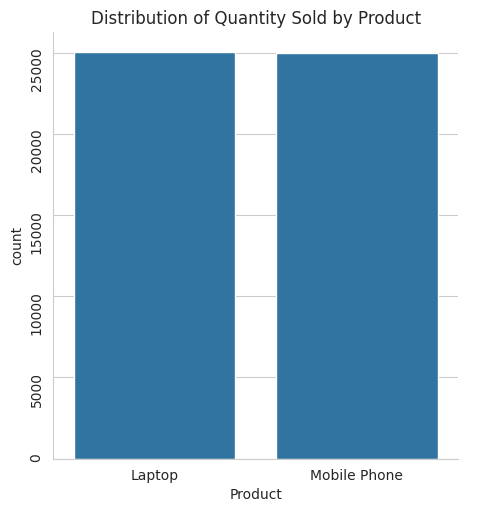

In [264]:
#Product types Quantity solid
sns.catplot(data=df, x='Product', kind='count',
              order=df['Product'].value_counts().index)
plt.title('Distribution of Quantity Sold by Product')
plt.yticks(rotation=90)
plt.show()

#Region wise Sales

#### Distribution of Laptop Sales by Region

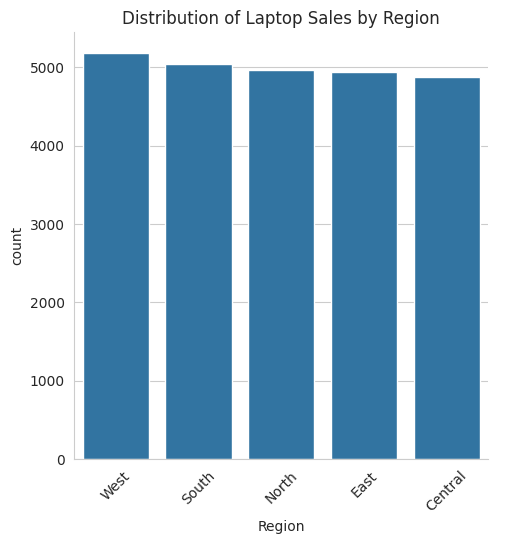

In [265]:
sns.catplot(data=lap, x='Region', kind='count',
              order=lap['Region'].value_counts().index)
plt.title("Distribution of Laptop Sales by Region")
plt.xticks(rotation=45)
plt.show()

#### Distribution of Mobile phone Sales by Region

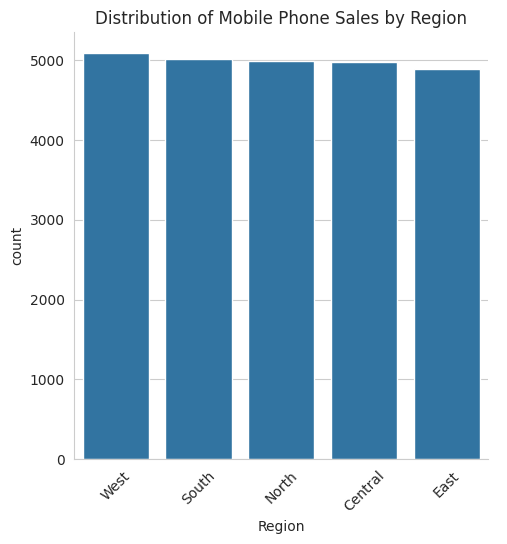

In [266]:
sns.catplot(data=ph, x='Region', kind='count',
              order=ph['Region'].value_counts().index)
plt.title("Distribution of Mobile Phone Sales by Region")
plt.xticks(rotation=45)
plt.show()

#Brand Distribution

#### Distribution of laptop Sales in Differet types of Brand

In [267]:
lap=df[df['Product'] == 'Laptop']

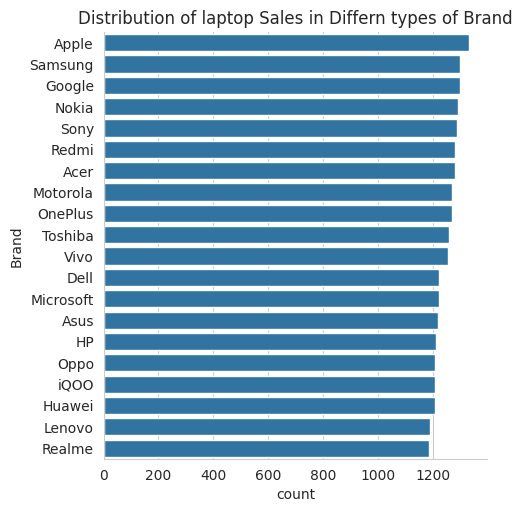

In [268]:
sns.catplot(data=lap, y='Brand', kind='count',
              order=lap['Brand'].value_counts().index)
plt.title("Distribution of laptop Sales in Differn types of Brand")
plt.show()

### Distribution of Mobile Phone Sales in Different types of Brand

In [269]:
ph=df[df['Product']=='Mobile Phone']

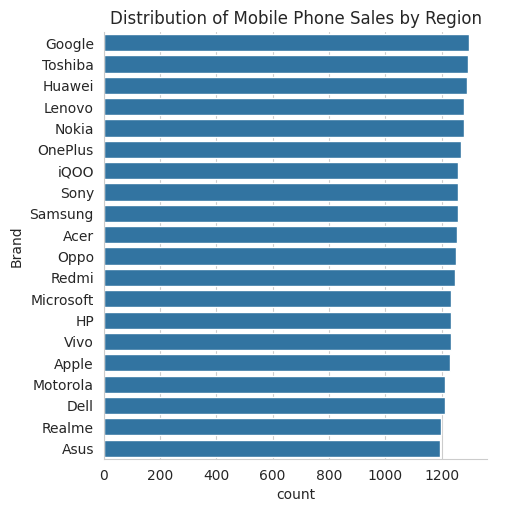

In [270]:
sns.catplot(data=ph, y='Brand', kind='count',
              order=ph['Brand'].value_counts().index)
plt.title("Distribution of Mobile Phone Sales by Region")
plt.show()

#Product Selling price

#### Distibution of Mobile phone sales price

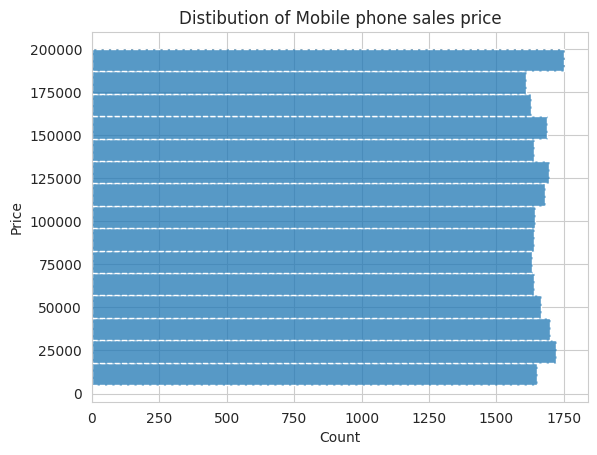

In [271]:
sns.histplot(data=ph,y='Price',bins=15,alpha=0.75,linestyle='--')
plt.title("Distibution of Mobile phone sales price")
plt.show()

#### Distibution of Laptop sales price

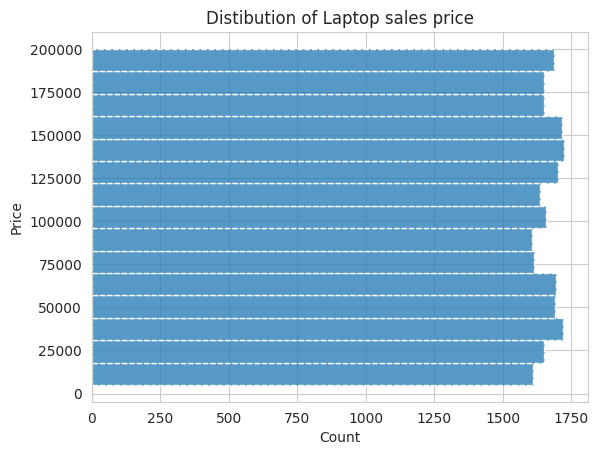

In [272]:
sns.histplot(data=lap,y='Price',bins=15,alpha=0.75,linestyle='--')
plt.title("Distibution of Laptop sales price")
plt.show()

#RAM Distribution

#### Distribution Laptop RAM

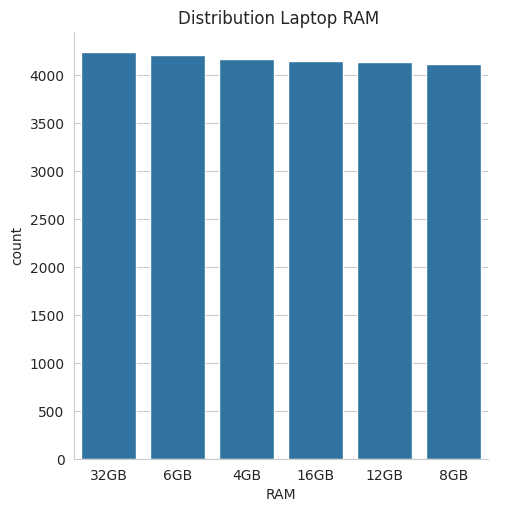

In [273]:
sns.catplot(data=lap,x='RAM',kind='count',order=lap['RAM'].value_counts().index)
plt.title("Distribution Laptop RAM ")
plt.show()

#### Distribution Mobile Phone RAM

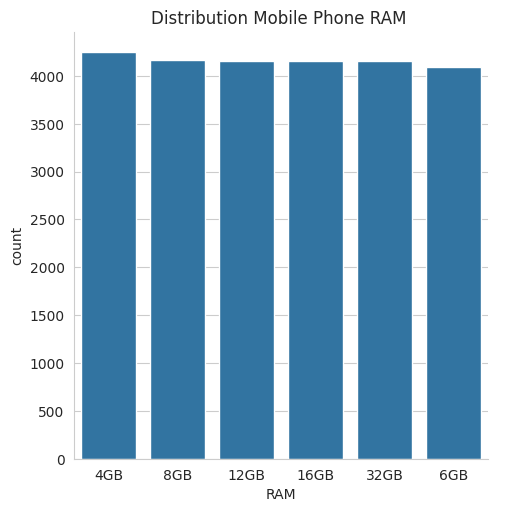

In [274]:
sns.catplot(data=ph,x='RAM',kind='count',order=ph['RAM'].value_counts().index)
plt.title("Distribution Mobile Phone RAM ")
plt.show()

# ROM Distribution

#### Distribution Laptop ROM

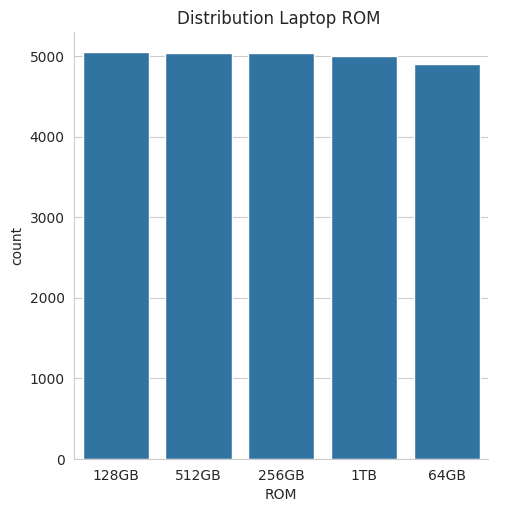

In [275]:
sns.catplot(data=lap,x='ROM',kind='count',order=lap['ROM'].value_counts().index)
plt.title("Distribution Laptop ROM ")
plt.show()

#### Distribution Mobile Phone ROM

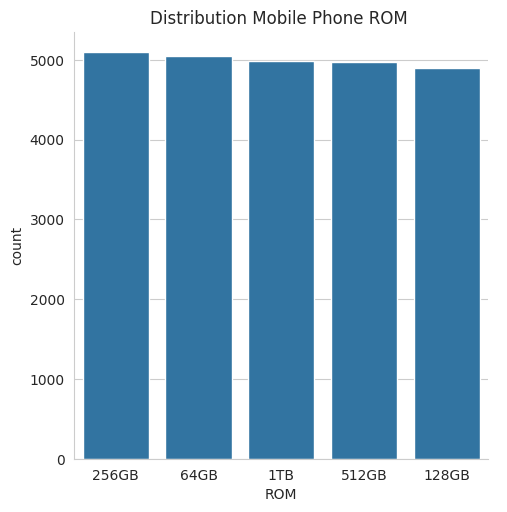

In [276]:
sns.catplot(data=ph,x='ROM',kind='count',order=ph['ROM'].value_counts().index)
plt.title("Distribution Mobile Phone ROM ")
plt.show()

#Quantity Sold BY Region

#### Mobile Phone Quantity Sold by Region

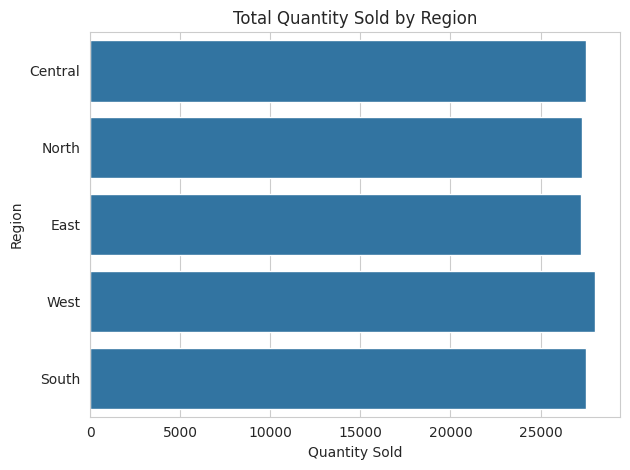

In [277]:
sns.barplot(data=ph, y='Region', x='Quantity Sold', estimator='sum', errorbar=None)
plt.title("Total Quantity Sold by Region")
plt.tight_layout()
plt.show()

#### Laptop Quantity Sold by Region

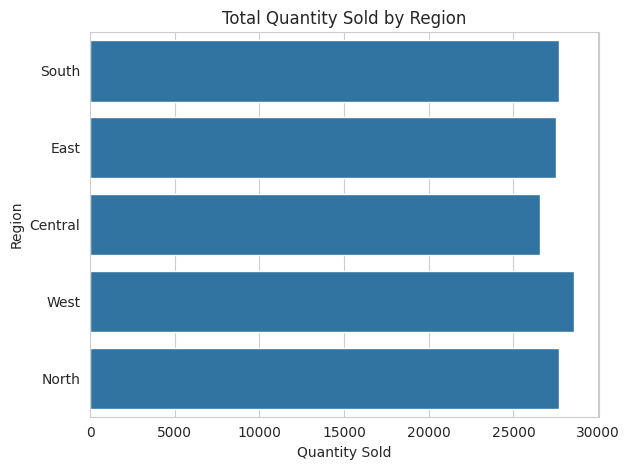

In [278]:
sns.barplot(data=lap, y='Region', x='Quantity Sold', estimator='sum', errorbar=None)
plt.title("Total Quantity Sold by Region")
plt.tight_layout()
plt.show()

In [279]:
df.columns

Index(['Product', 'Brand', 'Product Specification', 'Price', 'Quantity Sold',
       'Region', 'RAM', 'ROM'],
      dtype='object')

# Selling Brand by Reagion

#### Distribution of Mobile Phone Brands by Region

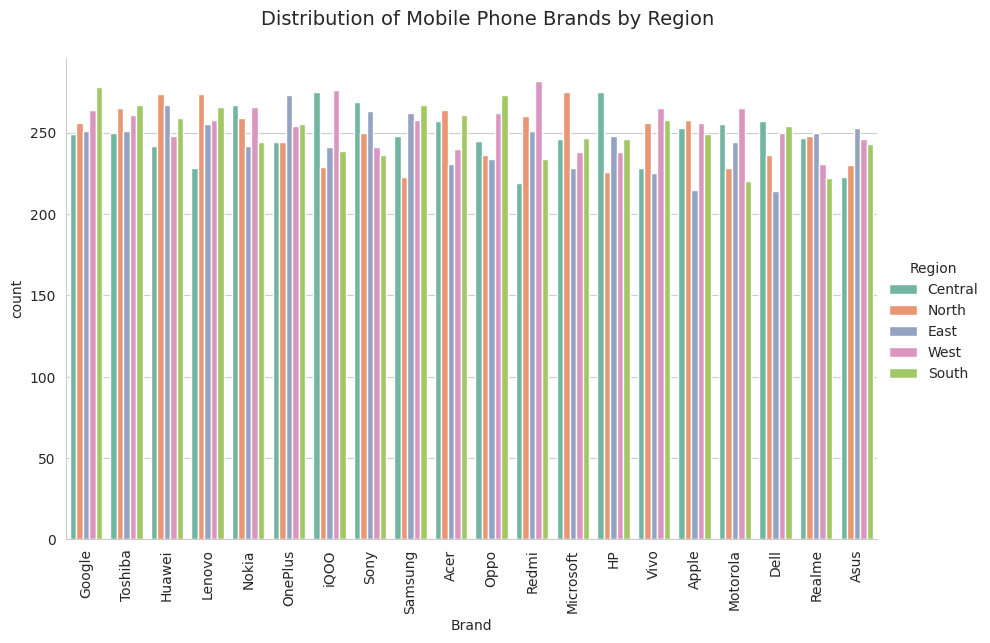

In [280]:
g = sns.catplot(data=ph,x='Brand',hue='Region',kind='count',order=ph['Brand'].value_counts().index,height=6,aspect=1.5,palette='Set2')

g.figure.suptitle("Distribution of Mobile Phone Brands by Region", fontsize=14)
g.figure.subplots_adjust(top=0.9)
plt.xticks(rotation=90)
plt.show()

#### Distribution of Laptop Brands by Region

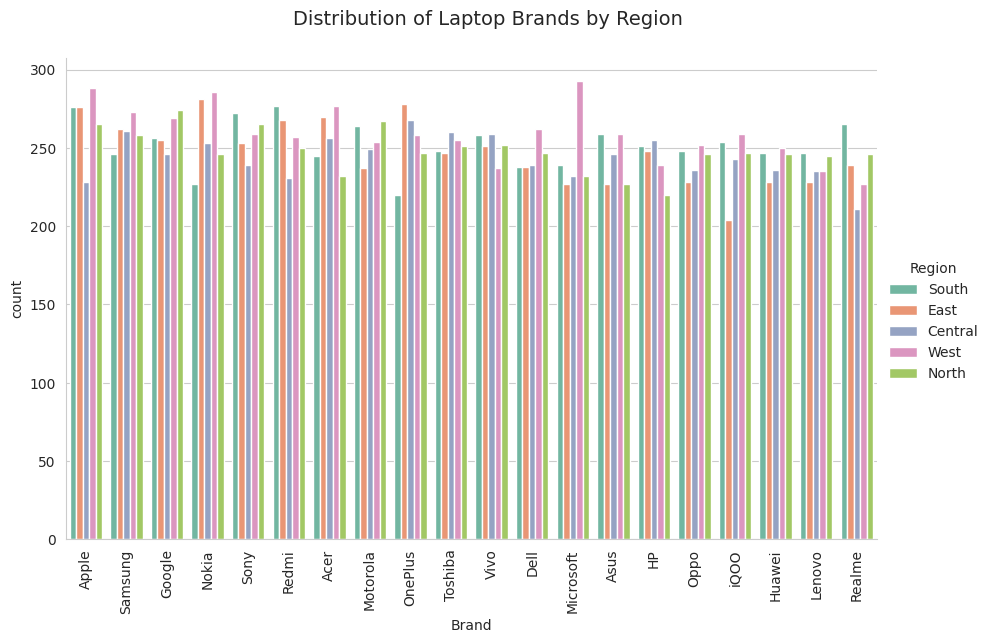

In [281]:
h = sns.catplot(data=lap,x='Brand',hue='Region',kind='count',order=lap['Brand'].value_counts().index,height=6,aspect=1.5,palette='Set2')

h.figure.suptitle("Distribution of Laptop Brands by Region", fontsize=14)
h.figure.subplots_adjust(top=0.9)
plt.xticks(rotation=90)
plt.show()

In [282]:
lap_sam=lap.sample(n=24983)

In [283]:
# concatnating the Mobile Phone And Lpatop
gadget=pd.concat([ph,lap_sam])
gadget.head()

,Product,Brand,Product Specification,Price,Quantity Sold,Region,RAM,ROM
0,Mobile Phone,Motorola,Site candidate activity company there bit insi...,78570,6,Central,12GB,128GB
2,Mobile Phone,Samsung,Energy special low seven place audience.,159826,5,Central,8GB,256GB
6,Mobile Phone,Dell,Could before almost wind couple evening perfor...,11670,6,North,16GB,256GB
9,Mobile Phone,Motorola,Responsibility form left final suffer party pi...,174698,10,North,6GB,64GB
10,Mobile Phone,Apple,To say system loss near him.,51251,9,North,4GB,256GB


In [284]:
# Handle categorical columns gadgets
categorical_cols_gadget = gadget.select_dtypes(include=['object']).columns

# Label Encoding

In [285]:
le = LabelEncoder()
for col in categorical_cols_gadget:
    gadget[col] = le.fit_transform(gadget[col])

In [286]:
gadget.head()

,Product,Brand,Product Specification,Price,Quantity Sold,Region,RAM,ROM
0,1,9,39029,78570,6,0,0,0
2,1,15,13098,159826,5,0,5,2
6,1,3,9346,11670,6,2,1,2
9,1,9,35767,174698,10,2,4,4
10,1,1,44875,51251,9,2,3,2


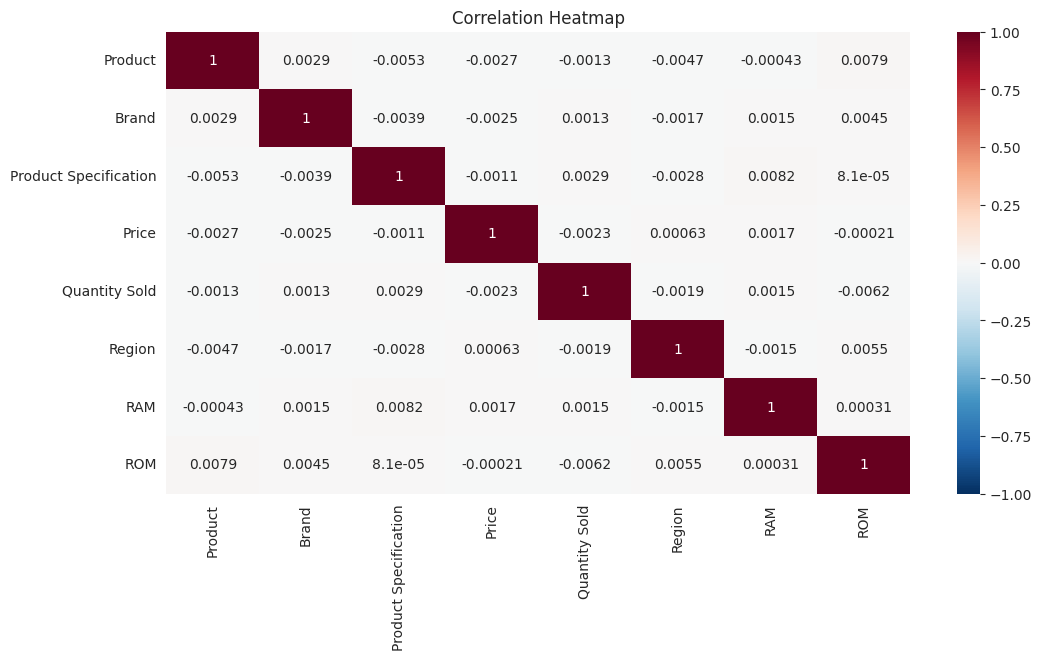

In [287]:
#Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(gadget.corr(), vmin=-1.0, center=0, cmap="RdBu_r", annot=True)
plt.title("Correlation Heatmap")
plt.show()

## Standard Scaling

In [288]:
'''#Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)'''

'#Scaling\nscaler = StandardScaler()\nx_train_scaled = scaler.fit_transform(x_train)\nx_test_scaled = scaler.transform(x_test)'

In [289]:
sc=StandardScaler()
sc_gad=sc.fit_transform(gadget)
Gadgets=pd.DataFrame(sc_gad,columns=gadget.columns)
Gadgets.head()

,Product,Brand,Product Specification,Price,Quantity Sold,Region,RAM,ROM
0,1.0,-0.088221,0.973832,-0.427223,0.168614,-1.425997,-1.466893,-1.417850
1,1.0,0.951208,-0.823943,1.014416,-0.178478,-1.425997,1.467081,-0.000085
2,1.0,-1.127650,-1.084066,-1.614159,0.168614,-0.014995,-0.880098,-0.000085
3,1.0,-0.088221,0.747681,1.278274,1.556981,-0.014995,0.880286,1.417680
4,1.0,-1.474126,1.379131,-0.911915,1.209889,-0.014995,0.293491,-0.000085


## splitting data into Training Data & Testing Data

In [290]:
x=Gadgets.drop("Quantity Sold",axis=1)
y=Gadgets["Quantity Sold"]

In [291]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [292]:
print(x.shape,x_train.shape,x_test.shape)

(49966, 7) (39972, 7) (9994, 7)


In [293]:
print(y.shape,y_train.shape,y_test.shape)

(49966,) (39972,) (9994,)


# Model Building

In [294]:
#Random Forest Regression
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_train)
rf_mae=mean_absolute_error(rf_pred,y_train)
rf_r2=r2_score(rf_pred,y_train)
rf_rmse=np.sqrt(mean_absolute_error(rf_pred,y_train))
print("Mean Absolute Error:",rf_mae)
print("R2 Score:",rf_r2)
print("Root Mean Square Error:",rf_rmse)

Mean Absolute Error: 0.3260815467058181
R2 Score: 0.6465788280635505
Root Mean Square Error: 0.5710355038925496


In [295]:
#Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_train)
mae_dt= mean_absolute_error(y_train, y_pred_dt)
r2_dt = r2_score(y_train, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_train, y_pred_dt))
print("\nDecision Tree Regression Results:")
print("MAE:",mae_dt)
print("RMSE:",rmse_dt)
print("R2 Score:",r2_dt)


Decision Tree Regression Results:
MAE: 4.850906916110867e-18
RMSE: 3.053362020252023e-17
R2 Score: 1.0


In [296]:
#XGBOOST
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_train)
mae_xgb= mean_absolute_error(y_train, y_pred_xgb)
r2_xgb = r2_score(y_train, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_train, y_pred_xgb))
print("\nXGBOOST Regression Results:")
print("MAE:",mae_xgb)
print("RMSE:",rmse_xgb)
print("R2 Score:",r2_xgb )


XGBOOST Regression Results:
MAE: 0.7648616899036698
RMSE: 0.8919937805600635
R2 Score: 0.20656617364903174


In [297]:
# Gradient Boosting Regressor
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_train)
mae_gb=mean_absolute_error(y_train, y_pred_gb)
r2_gb = r2_score(y_train, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_train, y_pred_gb))
print("\nGradient Boosting Results:")
print("MAE:",mae_gb)
print("RMSE:",rmse_gb)
print("R² Score:",r2_gb)


Gradient Boosting Results:
MAE: 0.8670530747662061
RMSE: 0.9952072412366456
R² Score: 0.012324879854951232


In [298]:
#KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_train)
mae_knn=mean_absolute_error(y_train, y_pred_knn)
rmse_knn=np.sqrt(mean_squared_error(y_train, y_pred_knn))
r2_knn=r2_score(y_train, y_pred_knn)
print("K-Nearest Neighbors Regression Results:")
print("MAE:",mae_knn)
print("RMSE:",rmse_knn)
print("R2 Score:",r2_knn)

K-Nearest Neighbors Regression Results:
MAE: 0.7533191944915876
RMSE: 0.896227967451675
R2 Score: 0.19901562595969646


In [299]:
#LASSO
lasso = Lasso()
lasso.fit(x_train, y_train)
# Calculate y_pred_lasso BEFORE calculating metrics
y_pred_lasso = lasso.predict(x_train)
mae_lasso= mean_absolute_error(y_train, y_pred_lasso)
r2_lasso = r2_score(y_train, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_train, y_pred_lasso))
print("\nLasso Regression Results:")
print("MAE:",mae_lasso)
print("RMSE:",rmse_lasso)
print("R2 Score:",r2_lasso )


Lasso Regression Results:
MAE: 0.873226072462762
RMSE: 1.001397425165118
R2 Score: 0.0


In [300]:
results = pd.DataFrame({
    "Model": [
        "Lasso Regression",
        "Decision Tree",
        "Random Forest",
        "XGBoost",
        "Greadient Boosting",
        "K-Nearest Neighbors Regression"
    ],
    "R2 Score": [
        r2_lasso, r2_dt, rf_r2, r2_xgb,r2_gb,r2_knn
    ],
    "RMSE": [
        rmse_lasso, rmse_dt, rf_rmse, rmse_xgb,rmse_gb,rmse_knn
    ],
    "MAE":[
        mae_lasso,mae_dt,rf_mae,mae_xgb,mae_gb,mae_knn
    ]
})

In [301]:
print("\n=== Model Performance Summary By R2 Score ===")
r2=results.sort_values(by="R2 Score", ascending=False)
print(r2)


=== Model Performance Summary By R2 Score ===
                            Model  R2 Score          RMSE           MAE
1                   Decision Tree  1.000000  3.053362e-17  4.850907e-18
2                   Random Forest  0.646579  5.710355e-01  3.260815e-01
3                         XGBoost  0.206566  8.919938e-01  7.648617e-01
5  K-Nearest Neighbors Regression  0.199016  8.962280e-01  7.533192e-01
4              Greadient Boosting  0.012325  9.952072e-01  8.670531e-01
0                Lasso Regression  0.000000  1.001397e+00  8.732261e-01


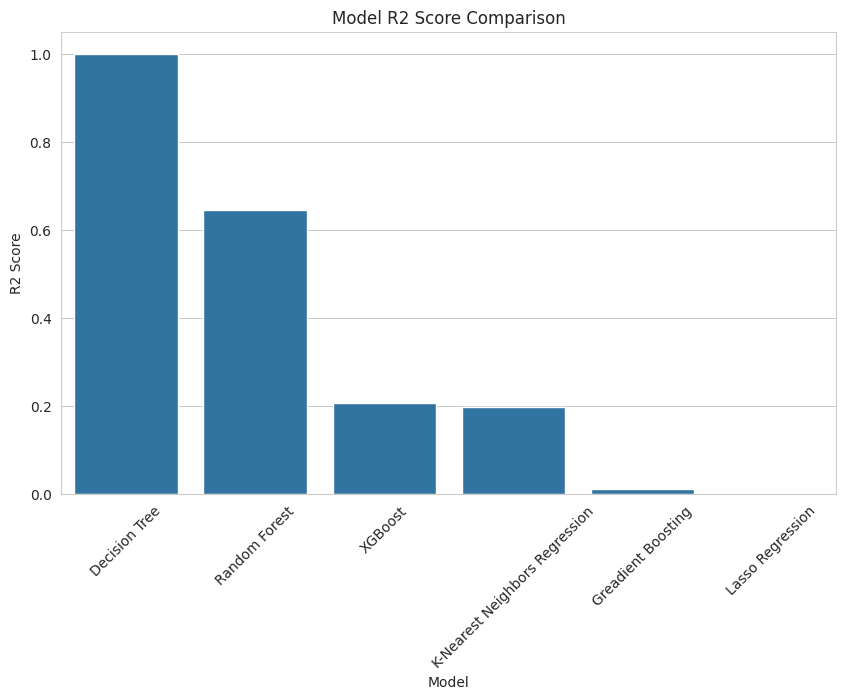

In [302]:
# R2 Comparison
plt.figure(figsize=(10,6))
sns.barplot(data=r2, x="Model", y="R2 Score")
plt.title('Model R2 Score Comparison')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.show()

**Based on R2 Score (higher is better):**
Dession Tree  : 1.000000

In [303]:
print("\n=== Model Performance Summary By RMAE ===")
rmse=results.sort_values(by="RMSE", ascending=True)
print(rmse)


=== Model Performance Summary By RMAE ===
                            Model  R2 Score          RMSE           MAE
1                   Decision Tree  1.000000  3.053362e-17  4.850907e-18
2                   Random Forest  0.646579  5.710355e-01  3.260815e-01
3                         XGBoost  0.206566  8.919938e-01  7.648617e-01
5  K-Nearest Neighbors Regression  0.199016  8.962280e-01  7.533192e-01
4              Greadient Boosting  0.012325  9.952072e-01  8.670531e-01
0                Lasso Regression  0.000000  1.001397e+00  8.732261e-01


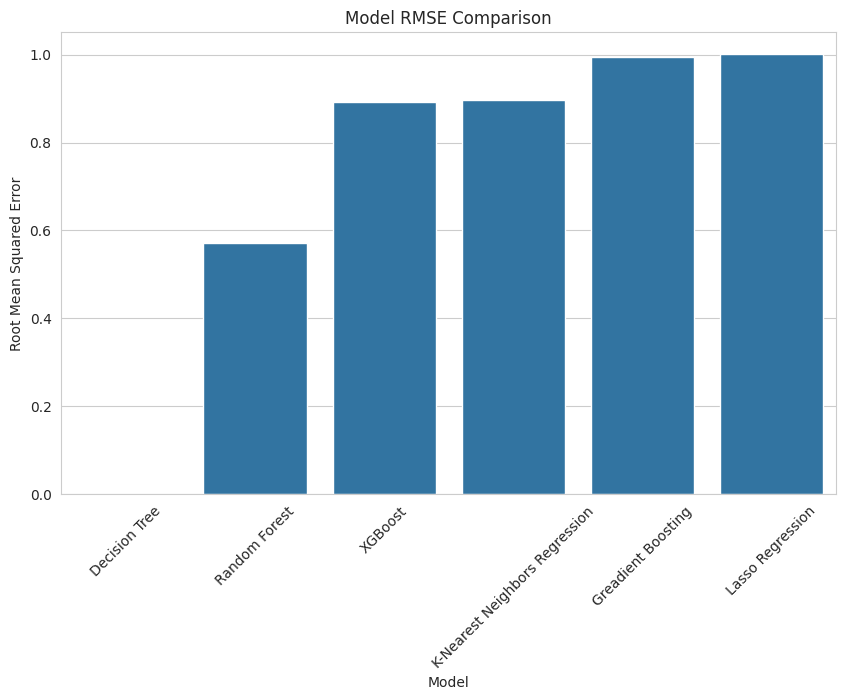

In [304]:
# RMSE Comparison
plt.figure(figsize=(10,6))
sns.barplot(data=rmse, x="Model", y="RMSE")
plt.title('Model RMSE Comparison')
plt.ylabel('Root Mean Squared Error')
plt.xticks(rotation=45)
plt.show()

**Based on RMSE (lower is better):**
Decision Tree :  2.226640


In [305]:
print("\n=== Model Performance Summary By MAE ===")
mae=results.sort_values(by="MAE", ascending=True)
print(mae)


=== Model Performance Summary By MAE ===
                            Model  R2 Score          RMSE           MAE
1                   Decision Tree  1.000000  3.053362e-17  4.850907e-18
2                   Random Forest  0.646579  5.710355e-01  3.260815e-01
5  K-Nearest Neighbors Regression  0.199016  8.962280e-01  7.533192e-01
3                         XGBoost  0.206566  8.919938e-01  7.648617e-01
4              Greadient Boosting  0.012325  9.952072e-01  8.670531e-01
0                Lasso Regression  0.000000  1.001397e+00  8.732261e-01


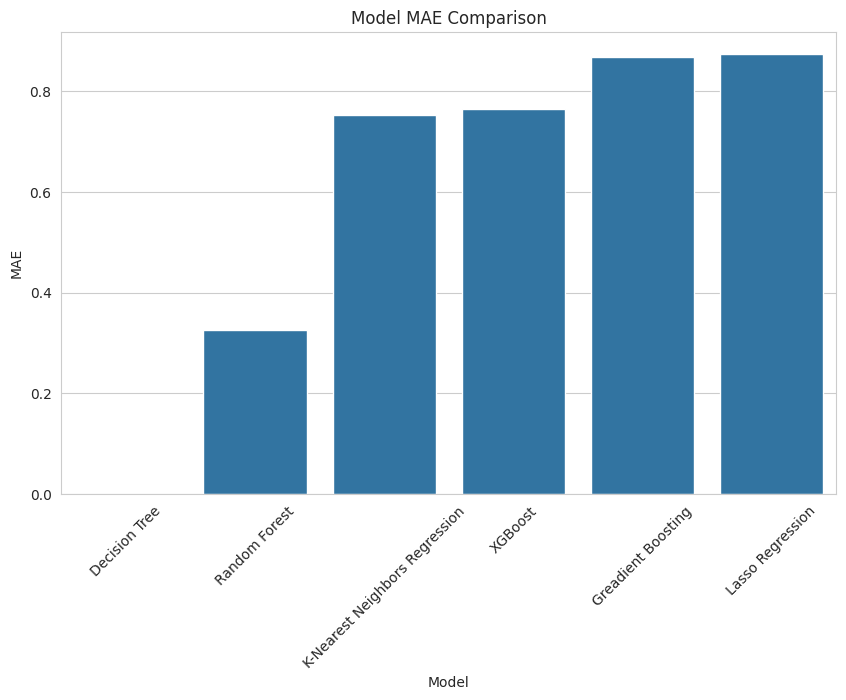

In [306]:
# MAE Comparison
plt.figure(figsize=(10,6))
sns.barplot(data=mae, x="Model", y="MAE")
plt.title('Model MAE Comparison')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.show()

**Based on MAE (lower is better):**
Decision Tree : 2.478226

Best for Consistency (R2,MAE,RMSE) → Decision Tree

#F1 Score

In [307]:
# Round y_test once
y_test_class = np.round(y_test)

In [308]:
# Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
y_pred_rf_class = np.round(y_pred_rf)
f1_rf = f1_score(y_test_class, y_pred_rf_class, average='weighted')
print("\nRandom Forest Regression Results:")
print(f"F1 Score: {f1_rf}")


Random Forest Regression Results:
F1 Score: 0.08117943694569126


In [309]:
# Decision Tree Regressor
dt= DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
y_pred_dt_class = np.round(y_pred_dt)
f1_dt = f1_score(y_test_class, y_pred_dt_class, average='weighted')
print("\nDecision Tree Regression Results:")
print(f"F1 Score: {f1_dt}")


Decision Tree Regression Results:
F1 Score: 0.2411300594474832


In [310]:
# XGBoost Regressor
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
y_pred_xgb_class = np.round(y_pred_xgb)
f1_xgb = f1_score(y_test_class, y_pred_xgb_class, average='weighted')
print("\nXGBoost Regression Results:")
print(f"F1 Score: {f1_xgb}")


XGBoost Regression Results:
F1 Score: 0.09274533940319127


In [311]:
# Lasso Regression
lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
y_pred_lasso_class = np.round(y_pred_lasso)
f1_lasso = f1_score(y_test_class, y_pred_lasso_class, average='weighted')
print("\nLasso Regression Results:")
print(f"F1 Score: {f1_lasso}")


Lasso Regression Results:
F1 Score: 0.0697030741281507


In [312]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
y_pred_gbr = gbr.predict(x_test)
y_pred_gbr_class = np.round(y_pred_gbr)
f1_gbr = f1_score(y_test_class, y_pred_gbr_class, average='weighted')
print("\nGradient Boosting Regression Results:")
print(f"F1 Score: {f1_gbr}")


Gradient Boosting Regression Results:
F1 Score: 0.06970886293922354


In [313]:
# K-Nearest Neighbors Regressor
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
y_pred_knn_class = np.round(y_pred_knn)
f1_knn = f1_score(y_test_class, y_pred_knn_class, average='weighted')
print("\nK-Nearest Neighbors Regression Results:")
print(f"F1 Score: {f1_knn}")


K-Nearest Neighbors Regression Results:
F1 Score: 0.18526863758546225


In [314]:
F1_Score = pd.DataFrame({
    "Model": [
        "Lasso Regression",
        "Decision Tree",
        "Random Forest",
        "XGBoost",
        "Greadient Boosting",
        "K-Nearest Neighbors Regression"
    ],
    "F1 Score": [
        f1_lasso, f1_dt, f1_rf, f1_xgb,f1_gbr,f1_knn
    ],
})

In [315]:
print("\n=== Model Performance Summary By F1_SCORE ===")
f1=F1_Score.sort_values(by="F1 Score", ascending=False)
print(f1)


=== Model Performance Summary By F1_SCORE ===
                            Model  F1 Score
1                   Decision Tree  0.241130
5  K-Nearest Neighbors Regression  0.185269
3                         XGBoost  0.092745
2                   Random Forest  0.081179
4              Greadient Boosting  0.069709
0                Lasso Regression  0.069703


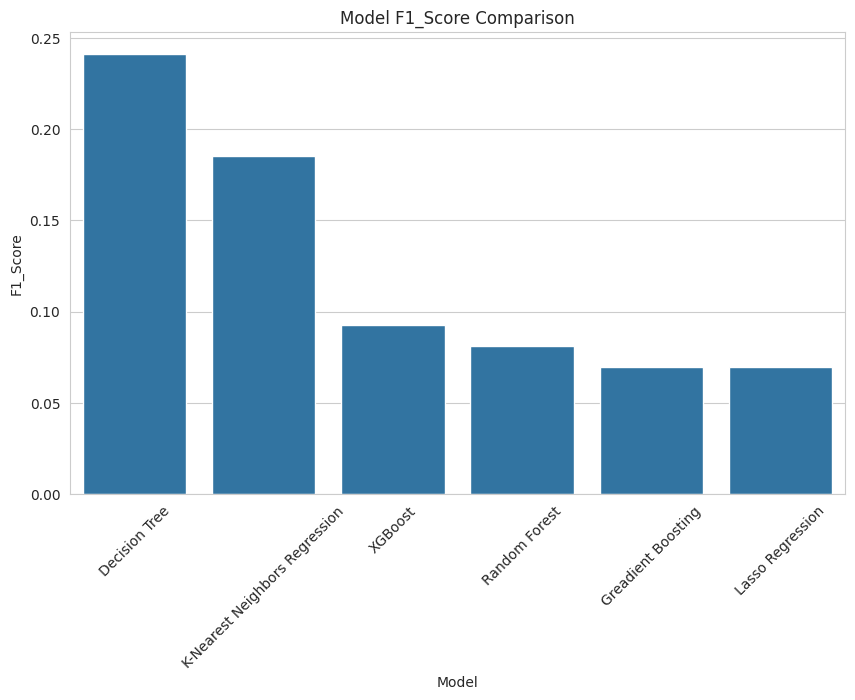

In [316]:
# F1_Score Comparison
plt.figure(figsize=(10,6))
sns.barplot(data=f1, x="Model", y="F1 Score")
plt.title('Model F1_Score Comparison')
plt.ylabel('F1_Score')
plt.xticks(rotation=45)
plt.show()

### Best model based on F1 score is:Decision Tree --> 0.238372

In [318]:
# Model dictionary
models = {
    'Lasso': Lasso(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'K-Nearest Neighbors Regression':KNeighborsRegressor()
}

In [319]:
# Hyperparameters
params = {
    'Lasso': {'alpha': [0.1, 1.0, 10.0]},
    'DecisionTree': {'max_depth': [5, 10, 20]},
    'RandomForest': {'n_estimators': [50, 100, 200]},
    'GradientBoosting': {'n_estimators': [50, 100, 200]}}

In [320]:
# Split the scaled data
X = Gadgets.drop("Quantity Sold", axis=1)
y = Gadgets["Quantity Sold"]
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

best_models = {}

def train_and_tune(name, model, X_train, y_train):
    """Train model with or without hyperparameter tuning."""
    if name in params:
        grid = GridSearchCV(model, params[name], cv=5, scoring='r2', n_jobs=-1)
        grid.fit(X_train, y_train)
        return grid.best_estimator_
    else:
        model.fit(X_train, y_train)
        return model

# Train all models
for name, model in models.items():
    print(f"Training {name}...")
    best_models[name] = train_and_tune(name, model, X_train_scaled, y_train)

Training Lasso...
Training DecisionTree...
Training RandomForest...
Training GradientBoosting...
Training XGBoost...
Training K-Nearest Neighbors Regression...


In [321]:
#Evaluate
eval_results = {
    'Model': [],
    'R2 Score': [],
    'RMSE': [],
    'MAE': []
}

# Dictionary to store evaluation results
for name, model in best_models.items():
    y_pred = model.predict(X_train_scaled)
    r2=r2_score(y_train,y_pred)
    rmae=np.sqrt(mean_squared_error(y_train, y_pred))
    mae=mean_absolute_error(y_train, y_pred)
    print(f"\nModel: {name}")
    print(f"R2 Score: {r2}")
    print(f"RMSE: {rmae}")
    print(f"MAE: {mae}")

# Save results
    eval_results['Model'].append(name),
    eval_results['R2 Score'].append(r2),
    eval_results['RMSE'].append(rmae),
    eval_results['MAE'].append(mae)

# Convert results to DataFrame
eval_df = pd.DataFrame(eval_results)


Model: Lasso
R2 Score: 0.0
RMSE: 1.001397425165118
MAE: 0.873226072462762

Model: DecisionTree
R2 Score: 0.00232325632679653
RMSE: 1.0002334972944924
MAE: 0.8717297658665892

Model: RandomForest
R2 Score: 0.8566120747575873
RMSE: 0.37919513847114633
MAE: 0.3254338538135193

Model: GradientBoosting
R2 Score: 0.006572409142005076
RMSE: 0.9981012034111976
MAE: 0.8699517722068729

Model: XGBoost
R2 Score: 0.20656617364903174
RMSE: 0.8919937805600635
MAE: 0.7648616899036698

Model: K-Nearest Neighbors Regression
R2 Score: 0.19901562595969646
RMSE: 0.896227967451675
MAE: 0.7533191944915876


In [322]:
#Print sorted by R2 Score
print("\n=== Model Performance Summary ===")
w_r2_scr=eval_df.sort_values(by="R2 Score", ascending=False)
print(w_r2_scr)


=== Model Performance Summary ===
                            Model  R2 Score      RMSE       MAE
2                    RandomForest  0.856612  0.379195  0.325434
4                         XGBoost  0.206566  0.891994  0.764862
5  K-Nearest Neighbors Regression  0.199016  0.896228  0.753319
3                GradientBoosting  0.006572  0.998101  0.869952
1                    DecisionTree  0.002323  1.000233  0.871730
0                           Lasso  0.000000  1.001397  0.873226


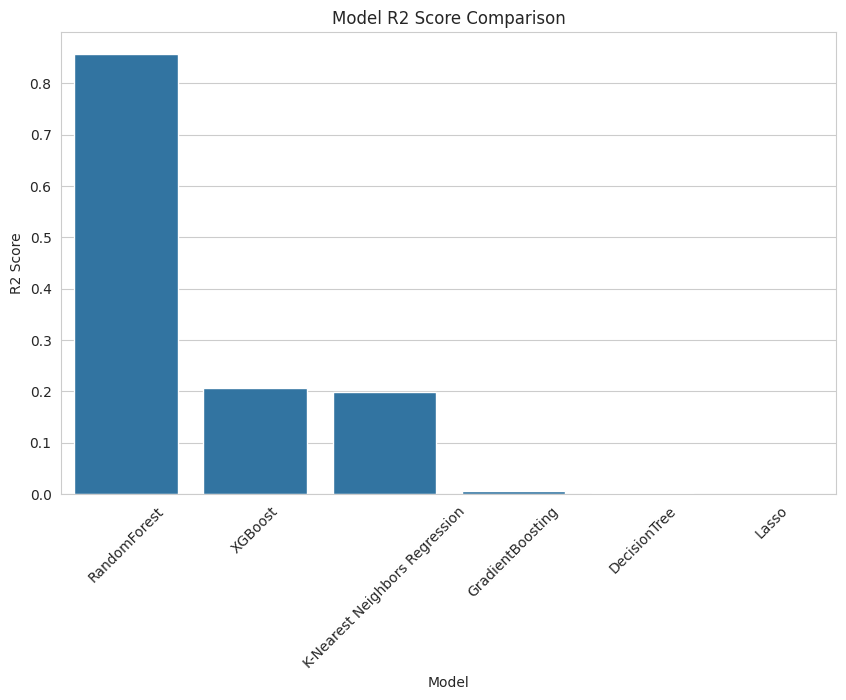

In [323]:
# R2 Comparison
plt.figure(figsize=(10,6))
sns.barplot(data=w_r2_scr, x="Model", y="R2 Score")
plt.title('Model R2 Score Comparison')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.show()

In [324]:
# Print sorted by RMSE
print("\n=== Model Performance Summary RMSE ===")
w_rmse=eval_df.sort_values(by="RMSE", ascending=True)
print(w_rmse)


=== Model Performance Summary RMSE ===
                            Model  R2 Score      RMSE       MAE
2                    RandomForest  0.856612  0.379195  0.325434
4                         XGBoost  0.206566  0.891994  0.764862
5  K-Nearest Neighbors Regression  0.199016  0.896228  0.753319
3                GradientBoosting  0.006572  0.998101  0.869952
1                    DecisionTree  0.002323  1.000233  0.871730
0                           Lasso  0.000000  1.001397  0.873226


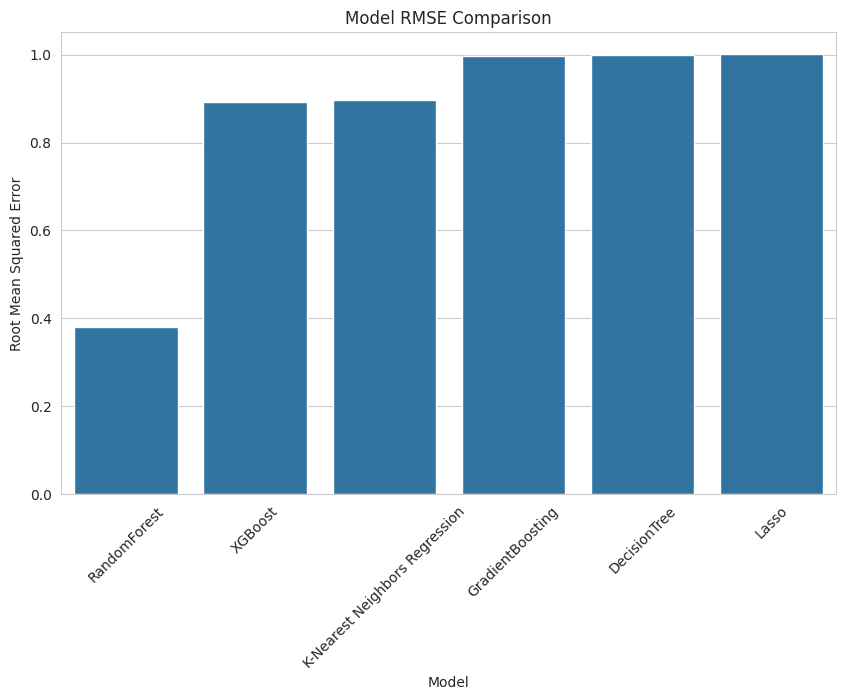

In [325]:
# RMSE Comparison
plt.figure(figsize=(10,6))
sns.barplot(data=w_rmse, x="Model", y="RMSE")
plt.title('Model RMSE Comparison')
plt.ylabel('Root Mean Squared Error')
plt.xticks(rotation=45)
plt.show()

In [326]:
# Print sorted by MAE
print("\n=== Model Performance Summary MAE ===")
w_mae=eval_df.sort_values(by="MAE", ascending=True)
print(w_mae)


=== Model Performance Summary MAE ===
                            Model  R2 Score      RMSE       MAE
2                    RandomForest  0.856612  0.379195  0.325434
5  K-Nearest Neighbors Regression  0.199016  0.896228  0.753319
4                         XGBoost  0.206566  0.891994  0.764862
3                GradientBoosting  0.006572  0.998101  0.869952
1                    DecisionTree  0.002323  1.000233  0.871730
0                           Lasso  0.000000  1.001397  0.873226


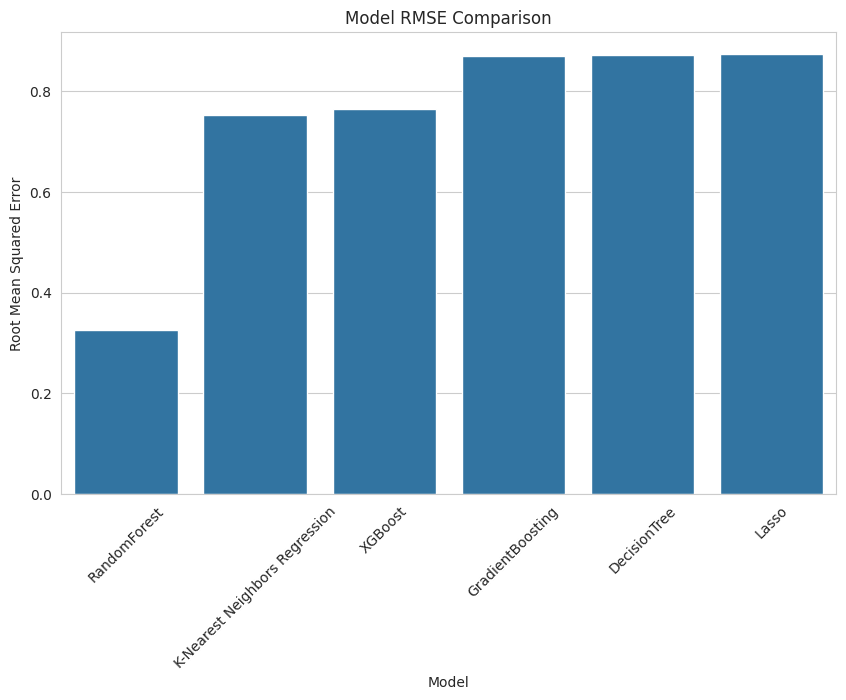

In [327]:
# MAE Comparison
plt.figure(figsize=(10,6))
sns.barplot(data=w_mae, x="Model", y="MAE")
plt.title('Model RMSE Comparison')
plt.ylabel('Root Mean Squared Error')
plt.xticks(rotation=45)
plt.show()